# Informe Técnico - base de datos ecommerce_db

## Introducción

Este informe presenta los resultados de una exploración inicial del conjunto de tablas que conforman la base de datos de un sistema de comercio electrónico . El análisis se llevó a cabo con el objetivo de evaluar la calidad de los datos, su capacidad para responder preguntas de negocio y su adecuación para futuros desarrollos analíticos, como la construcción de un modelo de datos orientado a reporte y análisis (por ejemplo, mediante tablas de hechos y dimensiones).

La revisión incluyó aspectos estructurales (tipos de datos, claves primarias y foráneas, normalización), de contenido (completitud, unicidad, consistencia) y de uso potencial (consultas típicas, indicadores posibles, necesidades de optimización). A partir de esta evaluación se identificaron posibles mejoras como la incorporación de índices, la estandarización de valores, o la necesidad de restricciones adicionales.

Si bien algunas definiciones clave —como las reglas de negocio específicas o los criterios para ciertos indicadores— no están formalizadas (dado el carácter académico del ejercicio), se avanzó en inferencias razonables a partir del contenido disponible y el contexto funcional implícito en un entorno de comercio electrónico.

Este informe servirá como insumo para próximas etapas del proyecto, incluyendo el diseño de un esquema analítico que permita responder preguntas clave del negocio, mejorar la calidad de la información y optimizar el rendimiento de consultas.


# Exploración Tabla Usuarios

## 1. Descripción general
- Cantidad de registros: 1000
- Columnas presentes: 7

## 2. Revisión de columnas
| Columna       | Tipo de dato | Valores no nulos | Observaciones                         |
| -----------   | ------------ | ---------------- | --------------------------------------|
| UsuarioID     | int64        | 1000             | Clave primaria.                       |
| Nombre        | object       | 1000             | Texto. No hay valores faltantes.      |
| Apellido      | object       | 1000             | Texto.                                |
| email         | object       | 1000             | texto.                                |
| Contraseña    | object       | 1000             | Unidades disponibles.                 |
| FechaRegistro | datetime     | 1000             | Fecha registro de usuario, default now|

## 3. Calidad de datos
- Valores faltantes: No hay
- Valores por defecto: Fecha de registro, fecha HOY.

## 4. Principales hallazgos
- Alta tasa de conversión (usuarios que realizaron órdenes)
- Usuarios con mayor gasto acumulado es elevado y tomando en cuenta valor promedio de ordenes, sugiere muchas compras y no compras voluminosas.
- - El valor máximo observado en una orden individual es de $999,99.

- - El gasto acumulado de los usuarios top (~$30.000) indica que han realizado al menos entre 30 y 60 órdenes, si consideramos los valores promedio y máximo del total en ordenes.

- - Esto sugiere una alta recurrencia de compra entre los usuarios top
- Todos los usuarios han realizado al menos una orden.
- Todos los usuarios han dejado al menos una reseña.

## 5. Visualizaciones
- Se incluye gráfico de barras con los 10 usuarios que más han gastado.


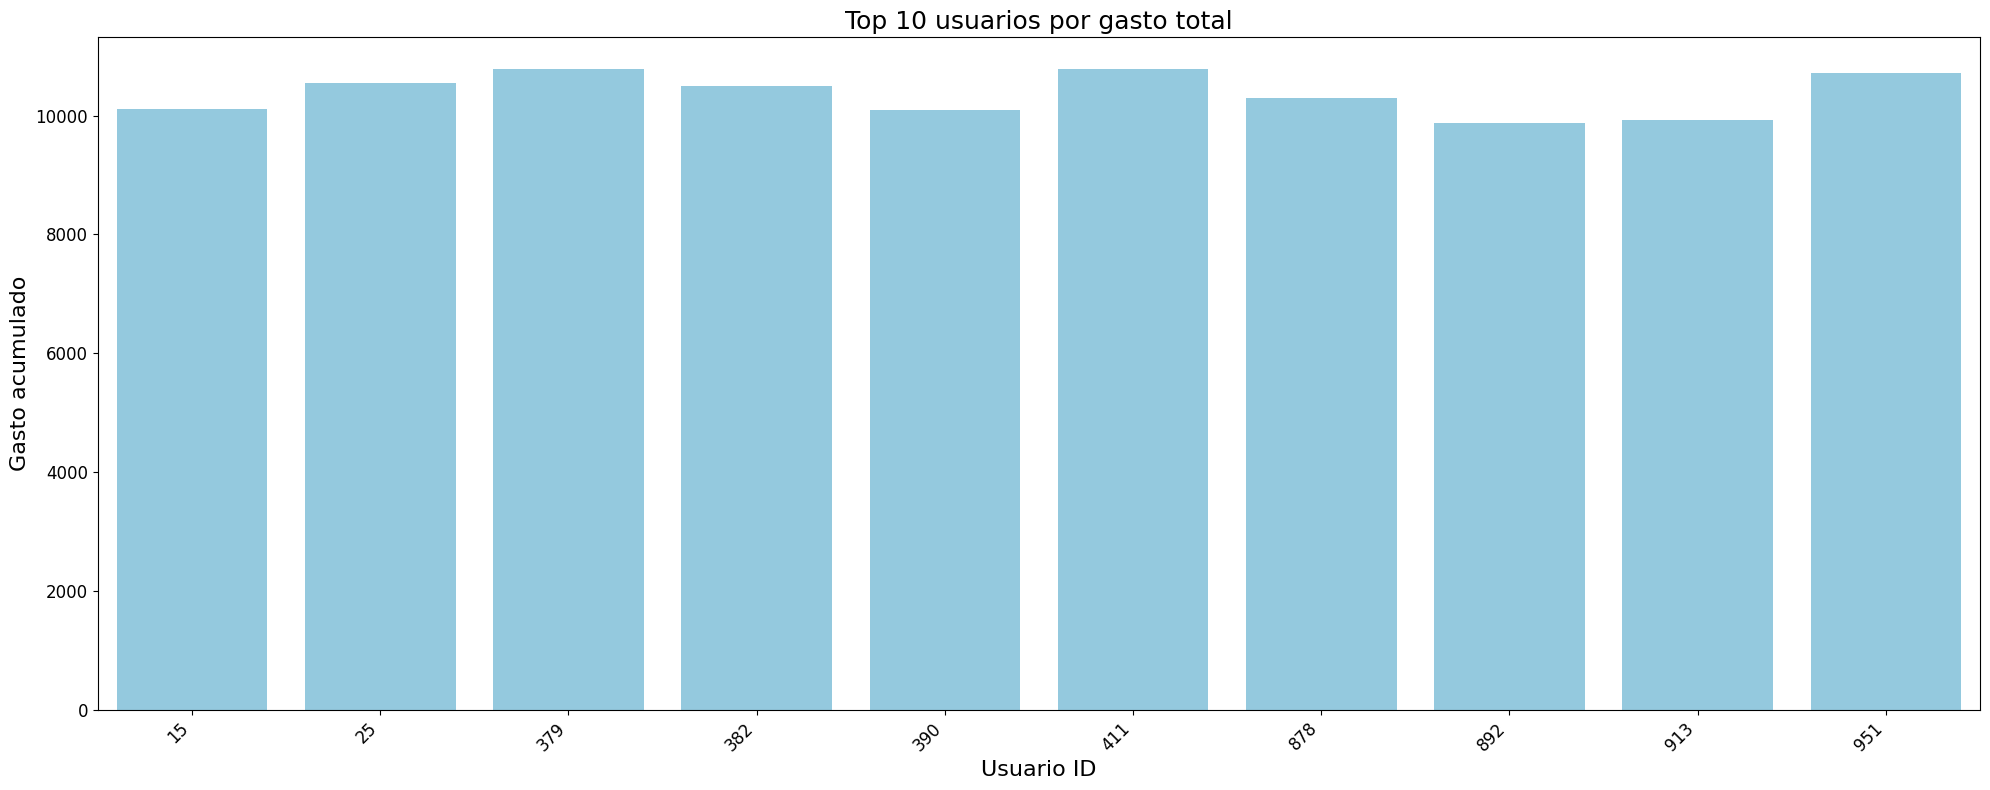

In [1]:
from app.utils import report_utils

report_utils.show_top_spenders_chart()


## 6. Recomendaciones
- Descartar columna `fecha_registro` del análisis temporal
- Posible estandarización de nombres a futuro
- Hashear columna contraseña por seguridad.

## 7. Consultas SQL relevantes
[Anexo](/pi_mod_02/scripts/sql/report.sql)

# Informe Técnico - Exploración Tabla Productos

## 1. Descripción general
- Cantidad de registros: 36
- Columnas presentes: 6

## 2. Revisión de columnas
| Columna     | Tipo de dato | Valores no nulos | Observaciones                      |
| ----------- | ------------ | ---------------- | ---------------------------------- |
| ProductoID  | int64        | 36               | Clave primaria.                    |
| Nombre      | object       | 36               | Texto. No hay valores faltantes.   |
| Descripcion | object       | 36               | Texto. Puede contener redundancia. |
| Precio      | float64      | 36               | Valor numérico.                    |
| Stock       | int64        | 36               | Unidades disponibles.              |
| CategoriaID | int64        | 36               | Clave foránea a `Categorias`.      |

## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: Stock, Precio y Nombre no pueden ser nulos.

## 4. Principales hallazgos
- Alta dispersión en precio de productos, son pocos items (en relación al número de órdenes (10000) y de compradores (1000) con precios que oscilan entre 20 y 799).
- Si bien la variabilidad en precios puede ser habitual, debería tomarse en cuenta para el análisis de venta la presencia de los items de mayor valor.
- En los diez productos de mayor valor se encuentra el máximo de 799 y el último de 299.
- El campo Nombre no es clave primaria, pero desde una perspectiva de negocio podría esperarse que sea único. No se detectaron valores duplicados, pero no hay una restricción que lo garantice actualmente.
- Se detectó un varianza moderada en el volumen de ventas de los distintos productos, no hay casi registros con menos de 790 unidades vendidas.

In [2]:
from app.utils import report_utils

report_utils.show_high_product_vs_low_stock()

,ProductoID,Nombre,Stock,total_vendido
0,7,Sartén Antiadherente 24cm,120,693
1,11,Pelota de Fútbol Profesional,100,750
2,33,"Power Bank 20,000mAh",70,777
3,15,Plancha para Cabello Remington,70,707
4,20,Limpiaparabrisas Universal,60,777
5,12,Mochila Deportiva Nike,50,771
6,14,Perfume Hombre 100ml,40,770
7,21,Cámara de Reversa,40,777
8,10,Bicicleta Montaña Aro 29,20,757


##### 5. Visualizaciones

* Se observan 5 outliers de precio por encima de 120, con uno de ellos alcanzando los 799. Esto contrasta con el resto de los productos cuyo precio ronda los 30.
* Se observan 3 outliers de stock entre 200 y 300.

Number of outliers in 'Precio': 5


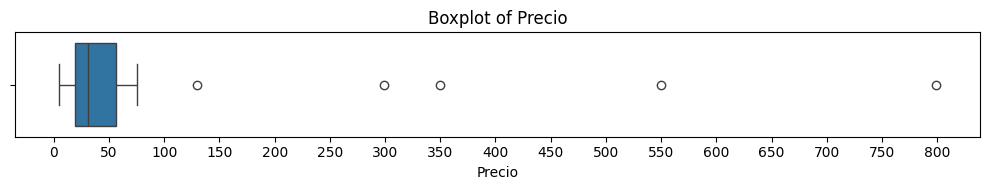

Number of outliers in 'Stock': 3


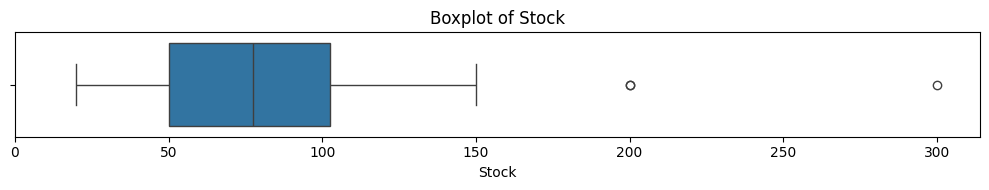

In [3]:
from app.utils import plot_utils

outliers_precio, lower_precio, upper_precio = plot_utils.plot_boxplot_with_outliers('Productos', 'Precio', step=50)

outliers_stock, lower_stock, upper_stock = plot_utils.plot_boxplot_with_outliers('Productos', 'Stock', step=50)

* Existen productos con altos niveles de stock pero sin ninguna venta registrada. El top 5 incluye Cuaderno Universitario 100h, Camiseta Básica Hombre, etc.

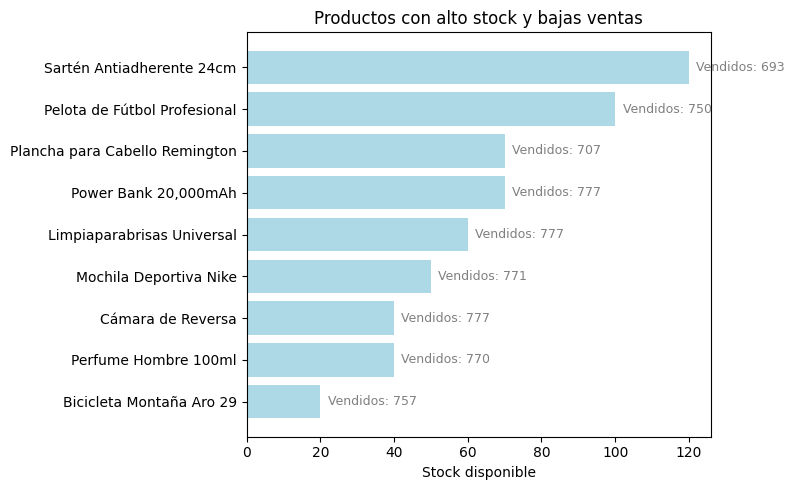

In [4]:
from app.utils import plot_utils

plot_utils.plot_high_stock_lowest_sells()



## 6. Recomendaciones
- Evaluar la necesidad de hacer único el campo Nombre, según el uso por parte del negocio.
- Aunque el campo Nombre no es clave primaria, desde el punto de vista del negocio podría requerirse unicidad para evitar confusiones. Por ejemplo, tener productos con el mismo nombre (aunque con diferente ProductoID) podría generar errores en reportes o en interfaces de usuario.
- Consultar con el área de negocio si debe garantizarse que cada producto tenga un nombre único
- Crear índice sobre Stock o Precio, dada su alta frecuencia de uso en consultas analíticas.
- Definir vistas para consultas recurrentes (por ejemplo, productos con baja rotación).
  
## 7. Consultas SQL relevantes
[Anexo](/pi_mod_02/scripts/sql/report.sql)

# Informe Técnico - Exploración Tabla Categorías

## 1. Descripción general
- Cantidad de registros: 12
- Columnas presentes: 3

## 2. Revisión de columnas
| Columna     | Tipo de dato | Valores no nulos | Observaciones                      |
| ----------- | ------------ | ---------------- | ---------------------------------- |
| CategoriaID | int64        | 12               | Clave primaria.                    |
| Nombre      | object       | 12               | Texto. No hay valores faltantes.   |
| Descripcion | object       | 12               | Texto. Puede contener redundancia. |


## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: -

## 4. Principales hallazgos
- El campo nombre no es único y es de texo libre al igual que la descripción. Aunque el campo Nombre no es clave primaria, desde una perspectiva de negocio podría esperarse que sea único. Por ejemplo, tener dos categorías llamadas "Electrónica" pero con distintos CategoriaID puede resultar confuso en reportes, búsquedas o visualización en interfaces.


## 6. Recomendaciones
- Evaluar la posibilidad de agregar una restricción de unicidad: 
```sql
ALTER TABLE "Categorias" ADD CONSTRAINT unique_categoria_nombre UNIQUE ("Nombre");
```
- Limpieza/ normalización de textos :
Ejemplos:
| Original                | Propuesta normalizada   |
| ----------------------- | ----------------------- |
| " electrónica  "        | "Electrónica"           |
| "Belleza Y cuidado"     | "Belleza y Cuidado"     |
| "DEPORTES Y aire libre" | "Deportes y Aire Libre" |

No se propone análisis exploratorio adicional sobre esta tabla, ya que su principal función es referencial y ya ha sido utilizada en las agregaciones de ventas por categoría. Se recomienda únicamente asegurar su consistencia y unicidad.

# Informe Técnico - Exploración Tabla Ordenes

## 1. Descripción general
- Cantidad de registros: 1000
- Columnas presentes: 5

## 2. Revisión de columnas
| Columna    | Tipo de dato     | Valores no nulos | Observaciones                                          |
| ---------- | ---------------- | ---------------- | ------------------------------------------------------ |
| OrdenID    | `int64`          | 10,000           | Clave primaria.                                        |
| UsuarioID  | `int64`          | 10,000           | Clave foránea a `Usuarios`.                            |
| FechaOrden | `datetime64[ns]` | 10,000           | Fecha en que se realizó la orden.                      |
| Total      | `float64`        | 10,000           | Monto total en la orden.                               |
| Estado     | `object`         | 10,000           | Estado de la orden (ej. 'Pendiente', 'Completada').    |

## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: Total no puede ser nulo y por default 'Estado' es pendiente

## 4. Principales hallazgos
- Aunque el monto total de las órdenes presenta alta dispersión, su distribución es simétrica, lo cual sugiere un balance entre productos económicos y costosos en las ventas."
- No hay categorias con marcado nivel deventas, por el contrario entre los primeros 10 productos cada uno es de diferentes categorias con lo cual no hay competencia a nivel categorias.
- Los dias de mayor venta son en fin de semana y Lunes 
- El volumen de ventas mensual es uniforme (alrededor de 800 órdenes por mes) a partir de agosto. En julio se registraron apenas 25 órdenes, lo que sugiere que puede tratarse del mes de inicio del negocio o del registro de datos. Sería interesante confirmarlo.

## 5. Visualizaciones


Se muestra distribución en importe de ordenes, la media está en torno a 500.

Number of outliers in 'Total': 0


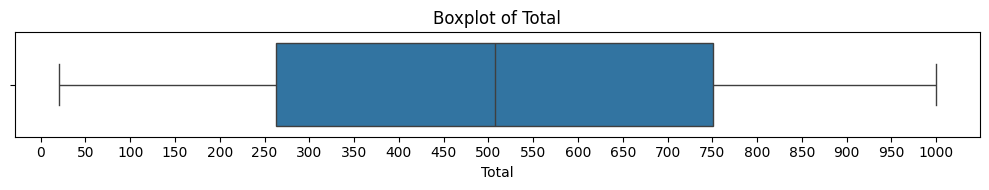

In [5]:
from app.utils import plot_utils

outliers_total, lower_total, upper_total = plot_utils.plot_boxplot_with_outliers('Ordenes', 'Total', step=50)

Prductos mas vendidos con sus categorias

In [7]:
from app.utils import report_utils

report_utils.show_top_categories_chart()

,ProductoID,Nombre,total_vendido
0,18,Juego de Mesa Monopoly,942
1,34,Consola PlayStation 5,935
2,26,Termómetro Digital,898
3,31,Smartwatch Xiaomi Mi Band 8,887
4,5,Jeans Skinny Mujer,887
5,32,Mini Proyector LED,885
6,23,Cuaderno Universitario 100h,876
7,29,Arenero para Gato,874
8,4,Camiseta Básica Hombre,868
9,24,Set de Lápices de Colores,856



## 6. Recomendaciones
- La columna Estado contiene valores categóricos ('Pendiente', 'Completada', 'Cancelada', 'Enviada'). Se recomienda extraer estos estados a una tabla aparte y establecer una relación mediante clave foránea.
Esto permitiría:

- - Normalizar la base de datos y reducir redundancias.

- - Evitar errores de escritura o inconsistencias en los valores.

- - Facilitar futuras extensiones (por ejemplo, incorporar nuevos estados con metadatos adicionales).

- - Mejorar la integridad referencial y la trazabilidad en el análisis de las órdenes.

  
## 7. Consultas SQL relevantes
[Anexo](/pi_mod_02/scripts/sql/report.sql)

# Informe Técnico - Exploración Tabla DetalleOrdenes

## 1. Descripción general
- Cantidad de registros: 10000
- Columnas presentes: 5

## 2. Revisión de columnas
| Columna            | Tipo de dato     | Valores no nulos | Observaciones                                          |
| -----------------  | ---------------- | ---------------- | ------------------------------------------------------ |
| DetalleID          | `int64`          | 10,000           | Clave primaria.                                        |
| OrdenID            | `int64`          | 10,000           | Clave foránea a `Ordenes`.                             |
| ProductoID         | `int64`         | 10,000           | Clave foránea a `Productos`.                           |
| Cantidad           | `int64`          | 10,000           | Numero de productos.                                   |
| PrecioUnitario     | `float64`        | 10,000           | Precio de cada producto                                |

## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: Cantidad y precio no pueden ser nulos.

## 4. Principales hallazgos
- En promedio, orden incluye 3 ítems por producto y orden.
- El total de ítems por orden (sumando todos los productos) tiene una media de aproximadamente 10 unidades, lo que indica que las órdenes suelen incluir múltiples productos
- Al observar la distribución, se nota que muchas órdenes concentran entre 20 y 30 ítems, lo que sugiere la existencia de un segmento de órdenes más grandes que elevan la dispersión.

## 5. Visualizaciones

### 5.1 Distribución de número de ítems por orden

- Se realizó un histograma con ajuste de densidad normal para analizar la cantidad total de ítems por orden (total de items sin distinguir su naturaleza).
    - Dado que el promedio calculado es 10 y la distribución tiene forma simétrica y centrada en torno a ~25 ítems , se evidencia variedad de compras pero algunas con muchos items distorsionan el promedio.

Histograma con curva de densidad.


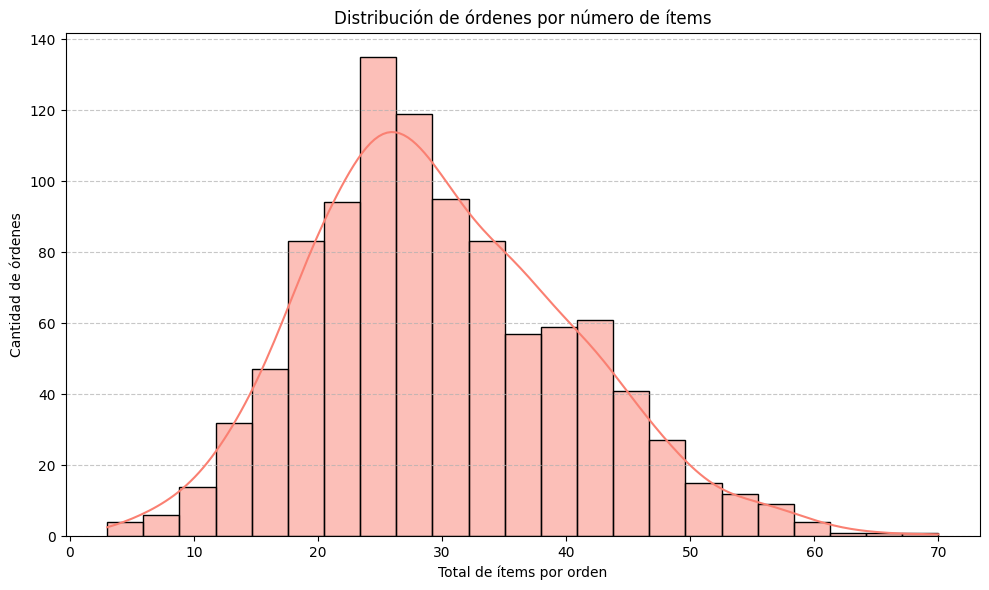

In [1]:
from app.utils import report_utils

report_utils.show_orders_distrbution_chart()

### 5.2 Cantidad promedio de ítems por orden

- No se observan outliers, y distribución simetrica en torno al promedio de items por orden (3)

Number of outliers in 'Cantidad': 0


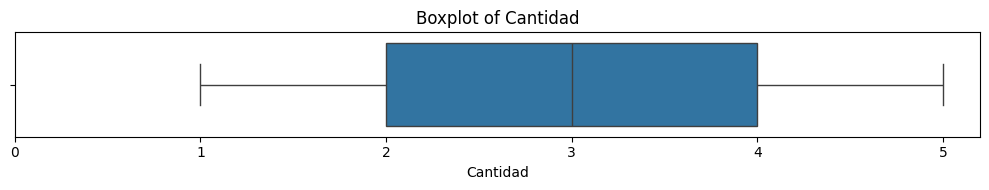

In [10]:
from app.utils import plot_utils

outliers_total, lower_total, upper_total = plot_utils.plot_boxplot_with_outliers('DetalleOrdenes', 'Cantidad', step=1)



## 6. Recomendaciones
- Se sugiere crear un campo agregado por orden que represente el total de ítems, para facilitar futuros análisis sin necesidad de agrupamiento.

- Incorporar un identificador de categoría desde la tabla Productos, lo que permitiría:
    - Estudiar el volumen de ítems por categoría.

    - Identificar patrones de combinación entre productos de diferentes categorías.

## 7. Consultas SQL relevantes
[Anexo](/pi_mod_02/scripts/sql/report.sql)

# Informe Técnico - Exploración Tabla DireccionesEnvio

## 1. Descripción general
- Cantidad de registros: 1000
- Columnas presentes: 10

## 2. Revisión de columnas
| Columna      | Tipo de dato | Valores no nulos | Observaciones                                        |
| ------------ | ------------ | ---------------- | ---------------------------------------------------- |
| DireccionID  | int64        | 1000             | Clave primaria.                                      |
| UsuarioID    | int64        | 1000             | Clave foránea a `Usuarios`.                          |
| Calle        | object       | 1000             | Texto libre.                                         |
| Ciudad       | object       | 1000             | Texto libre.                                         |
| Departamento | object       | 1000             | Texto libre, posible redundancia con `Provincia`.    |
| Provincia    | object       | 1000             | Texto libre.                                         |
| Distrito     | object       | 1000             | Texto libre. Puede no ser aplicable en todos países. |
| Estado       | object       | 1000             | Texto libre. Posible solapamiento con Provincia.     |
| CodigoPostal | object       | 1000             | Alfanumérico, no numérico.                           |
| Pais         | object       | 1000             | Texto libre. Requiere estandarización.               |


## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: Calle, Ciudad y Pais no pueden ser nulos.

## 4. Principales hallazgos
- `Pais`: 
    - Únicamente se registran direcciones en Argentina (columna Pais)
- `Provincia`: 
    - Se registran 23 provincias. Algunas provincias muestran mayor frecuencia (ej. Formosa, Chubut, Tierra del Fuego).
    - Se identifican posibles problemas de capitalización, acentos o abreviaciones.
- `Ciudad`: 
    - Se detectan 30 ciudades únicas, con frecuencias variables.

## 5. Visualizaciones
- Se elaboró un gráfico de barras horizontales para mostrar la cantidad de direcciones por provincia (top 20):



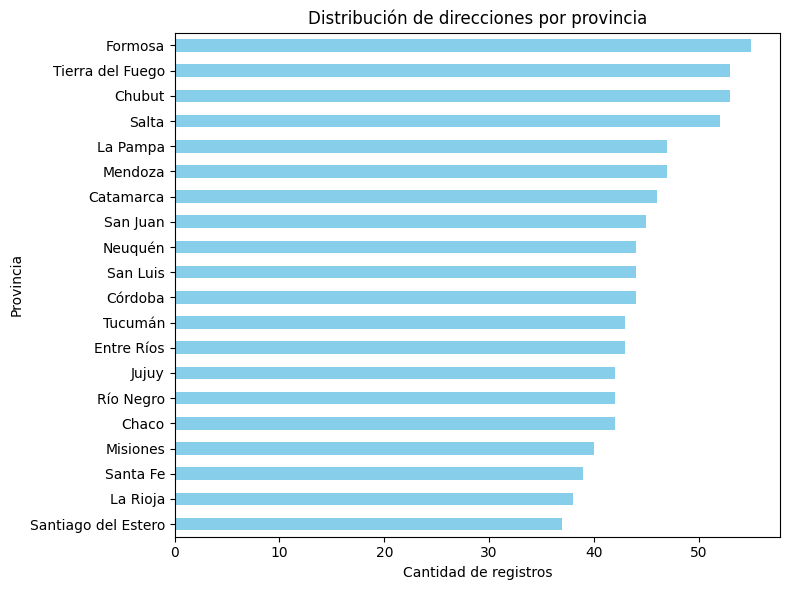

In [11]:
from app.utils import report_utils
report_utils.show_adress_distribution_chart()


Adicionalmente se grafica la distribución de ordenes y ventas por provincia. 

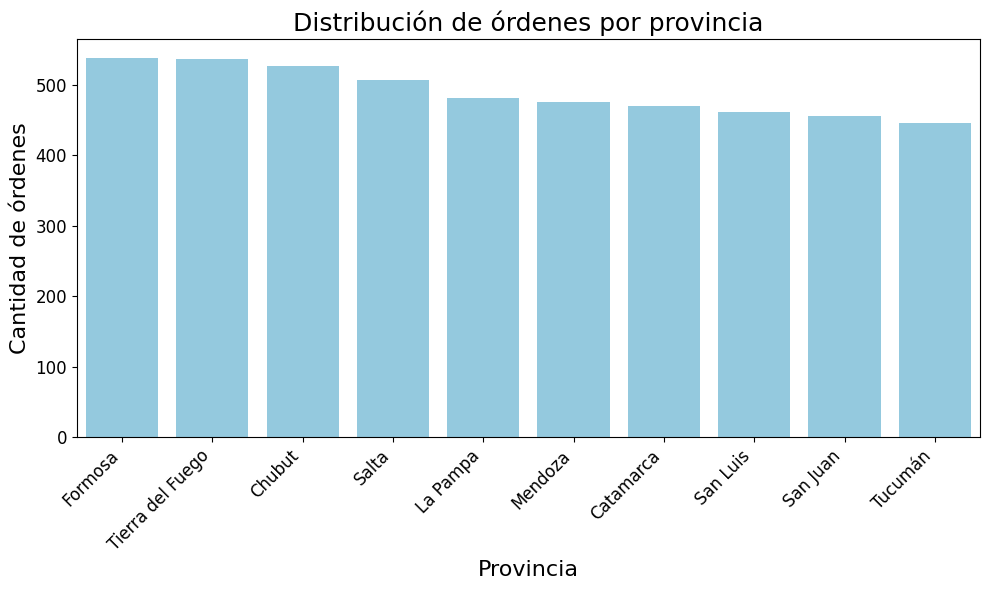

In [12]:
from app.utils import report_utils

report_utils.show_geographic_sales_distribution_chart()

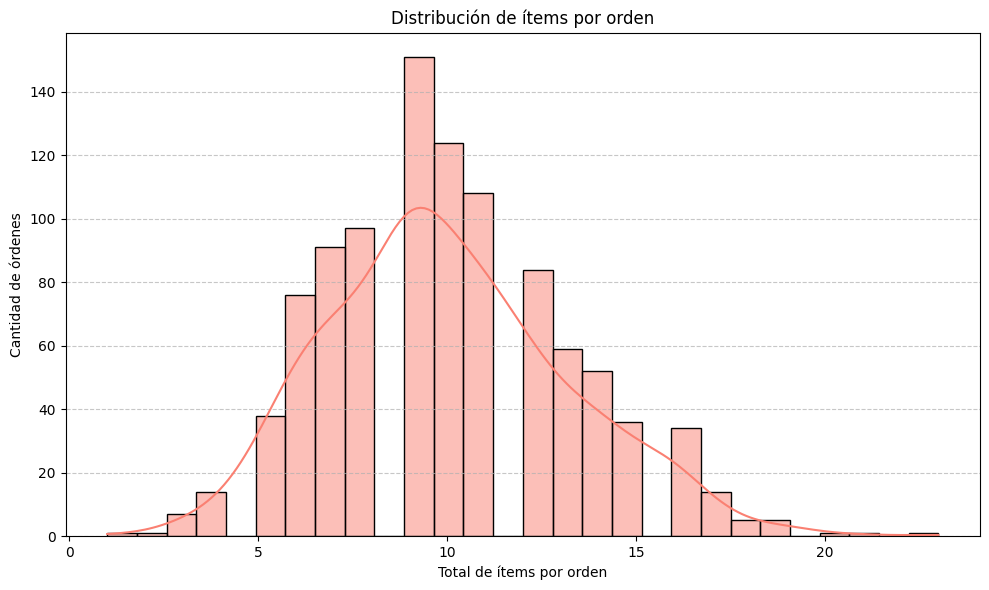

In [2]:
from app.utils import report_utils

report_utils.show_items_per_order_chart()


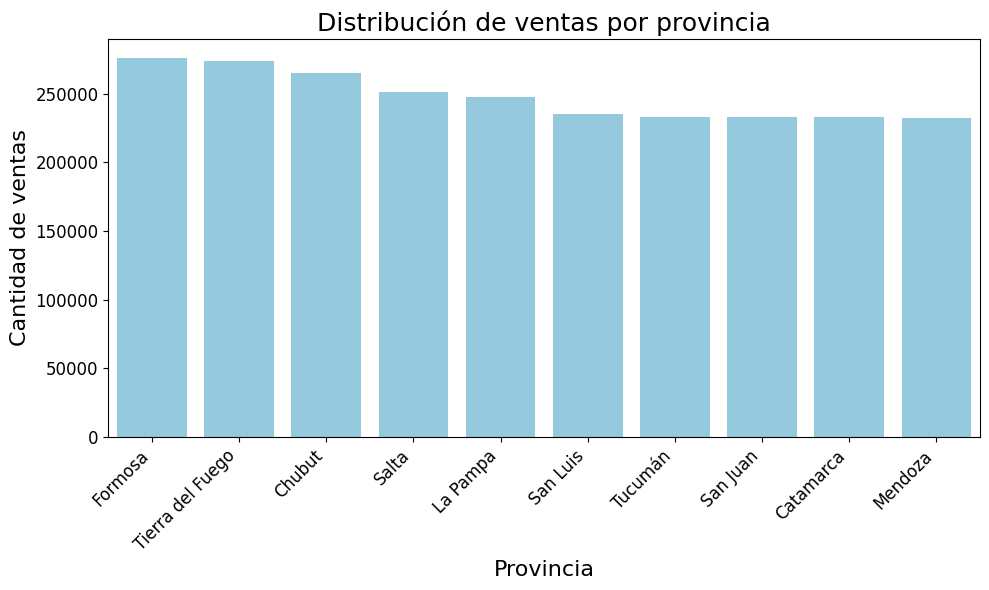

In [14]:
from app.utils import notebook_utils, postgres_utils, plot_utils

report_utils.show_sales_by_province()

Las visualizaciones propuestas ponen en evidencia la importancia de contar con datos normalizados y relaciones consistentes.

Por ejemplo, para visualizar correctamente la distribución geográfica de las órdenes, es fundamental que los datos de provincias o ciudades estén unificados, lo cual justifica la creación de tablas auxiliares como Provincia, Ciudad o EstadoOrden. Estas no solo mejoran la calidad del análisis visual, sino que reducen el riesgo de errores de interpretación debidos a inconsistencias de escritura o duplicación de valores.

## 6. Recomendaciones
- Consistencia total en campo `Pais`. Se recomienda usar una tabla auxiliar `Paises` para escalar el sistema en caso de incorporar direcciones de otros países.
- Crear una tabla auxiliar Provincias para normalizar este campo y garantizar su consistencia.
- Tabla auxiliar Ciudades con referencia a ProvinciaID.

## 7. Consultas SQL relevantes
[Anexo](/pi_mod_02/scripts/sql/report.sql)

# Informe Técnico - Exploración Tabla Carrito 

## 1. Descripción general
- Cantidad de registros: 5000
- Columnas presentes: 5

## 2. Revisión de columnas
| Columna       | Tipo de dato    | Valores no nulos | Observaciones                                 |
| ------------- | --------------- | ---------------- | --------------------------------------------- |
| CarritoID     | int64           | 5000             | Clave primaria.                               |
| UsuarioID     | int64           | 5000             | Clave foránea a `Usuarios`.                   |
| ProductoID    | int64           | 5000             | Clave foránea a `Productos`.                  |
| Cantidad      | int64           | 5000             | Valor numérico, cantidad agregada al carrito. |
| FechaAgregado | datetime64\[ns] | 5000             | Fecha y hora en que se agregó el producto.    |


## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: Cantidad no puede ser nulo, fechaAgregado por defecto HOY

## 4. Principales hallazgos
- Los productos con mayor frecuencia de agregado no necesariamente coinciden con los de mayor volumen en cantidad total.
- Se observa una distribución estable de carritos agregados por día, con un promedio diario cercano a 55 registros, con los 
- La cantidad promedio por producto agregado es cercana a 2 unidades, con muy baja dispersión (máximo 3), esto podría señalar un comportamiento homogneo entre usuarios. 
- Considerando promedios , el comportamiento es uniforme a lo largo de días de la semana, a diferencia de las ventas que tienen mayor frecuencia en fin de semana,pero no hay una tendencia clara de aumento o disminución fuerte durante el período.


## 5. Visualizaciones

- El gráfico indica que la actividad diaria de agregar productos al carrito es bastante estable con fluctuaciones normales. Hay leves picos, mayormente en fin de semana 

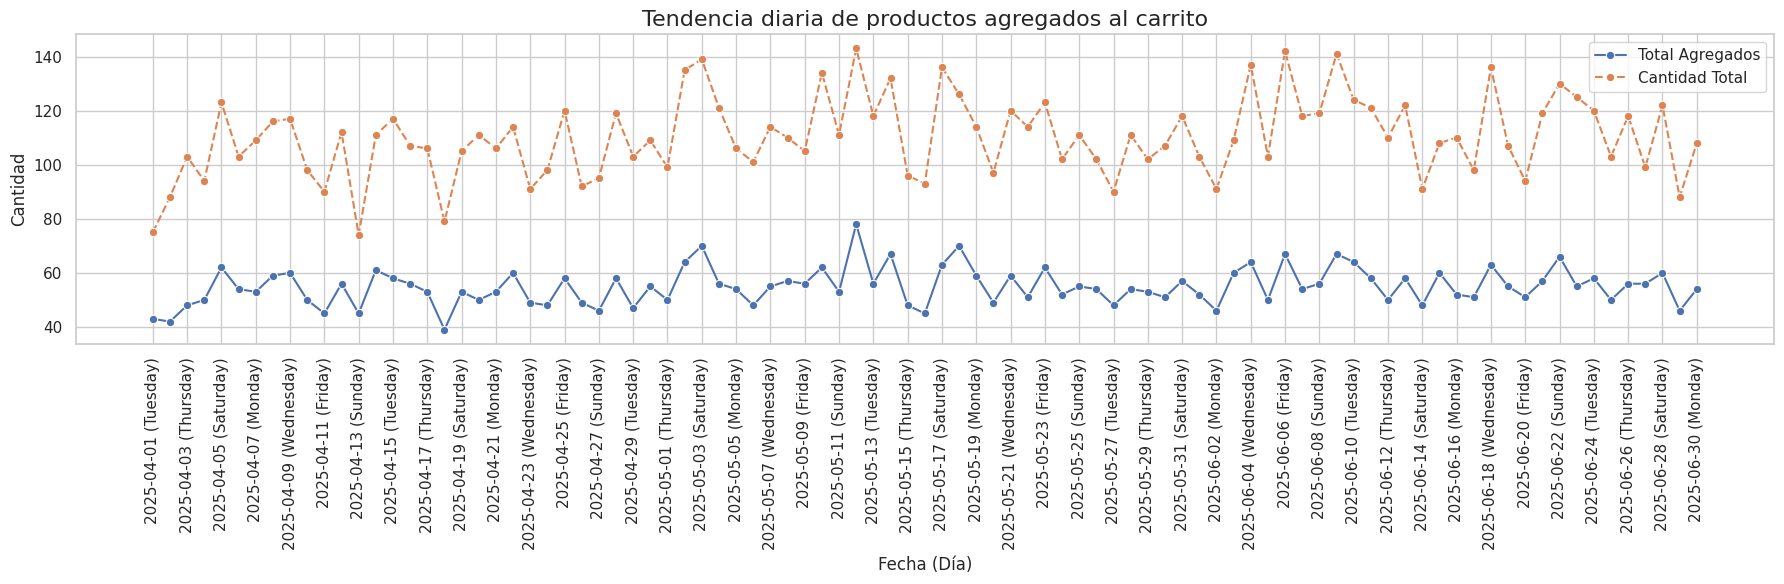

In [16]:
from app.utils import report_utils
report_utils.show_cart_adding_items_chart()


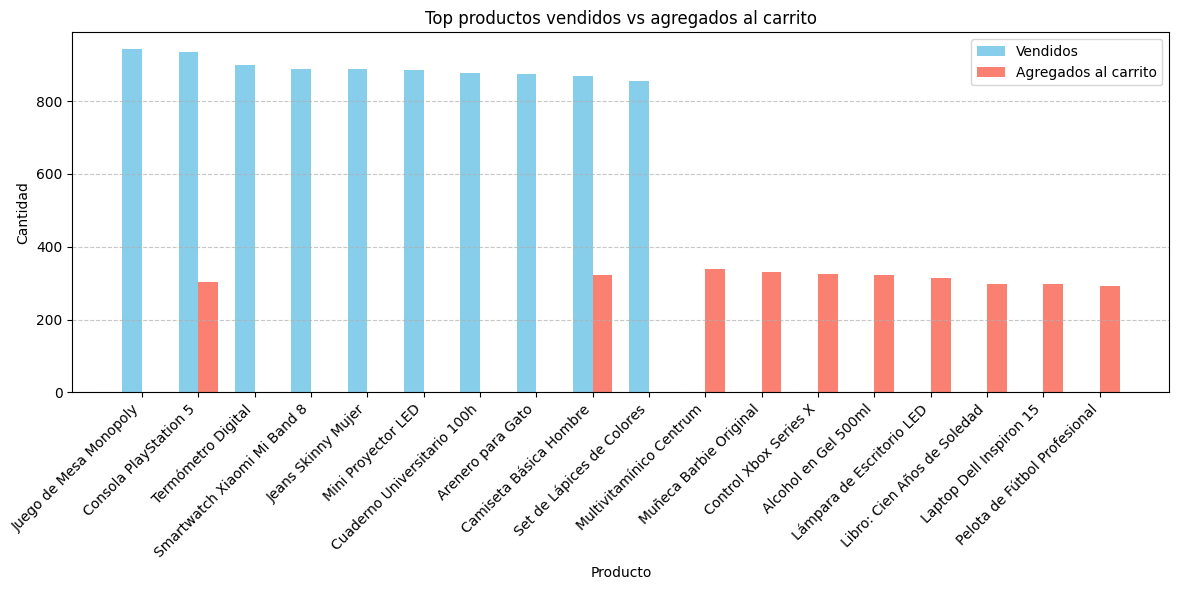

In [1]:
from app.utils import report_utils
report_utils.show_most_sale_and_more_added()

El gráfico compara los diez productos más vendidos, con los diez más agregados y rsulta interesante la baja coincidencia .

# Informe Técnico - Exploración Tabla MetodosPago

## 1. Descripción general
- Cantidad de registros: 7
- Columnas presentes: 3

## 2. Revisión de columnas
| Columna        | Tipo de dato | Valores no nulos | Observaciones                                                 |
| -------------- | ------------ | ---------------- | ------------------------------------------------------------- |
| `MetodoPagoID` | int64        | 5                | Clave primaria. Identificador único del método de pago.       |
| `Nombre`       | object       | 5                | Nombre del método de pago. Texto breve, sin valores nulos.    |
| `Descripcion`  | object       | 5                | Texto descriptivo. Puede tener redundancia o ser muy general. |

## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: Nombre no debe ser nulo, no se valida unicidad.

## 4. Principales hallazgos
- La columna `Nombre` contiene valores únicos en esta muestra, pero no se aplica ninguna restricción de unicidad a nivel de base de datos, lo cual puede provocar registros redundantes o inconsistentes.

El campo `Descripcion` parece no aportar información adicional significativa. Puede evaluarse su utilidad según el uso previsto.

## 5. Recomendaciones
- Agregar restricción de unicidad en `Nombre`, tras confirmar que no sea necesaria su otencial repetción.

- Según las necesidades podría jerarquiza por marca o banco emisor de.

- Si Descripcion no se utiliza activamente o no aporta valor, considerar eliminarla o establecer un estándar de redacción más útil (por ej. incluir condiciones o requisitos del método).


# Informe Técnico - Exploración Tabla OrdenesMetodosPago

## 1. Descripción general
- Cantidad de registros: 1000
- Columnas presentes: 4

## 2. Revisión de columnas

| Columna         | Tipo de dato | Valores no nulos | Observaciones                                                       |
| --------------- | ------------ | ---------------- | ------------------------------------------------------------------- |
| `OrdenMetodoID` | int64        | 10,000           | Clave primaria. Identificador único del registro de pago por orden. |
| `OrdenID`       | int64        | 10,000           | Clave foránea a `Ordenes`.                                          |
| `MetodoPagoID`  | int64        | 10,000           | Clave foránea a `MetodosPago`.                                      |
| `MontoPagado`   | float64      | 10,000           | Monto abonado por ese método en la orden.                           |


## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: ...-
- Validaciones aplicadas: Monto pagado no nulo.

## 4. Principales hallazgos
- No hay ordenes de compra con más de un medio de pago.
- El ticket promedio ronda los 500, sin embargo hay amplia variedad de tickets con mínimo en 100 y máximo en casi 1000.
- El grueso de montos pagados por orden se concentra entre 350 y 750 apx.
- La mayor facturación se percibió mediante crédito en tienda, pago contra entrega y mercadopago.
- El monto recaudado por mes se encuentra entre 110000 y 120000
- El monto promedio de pagos para los disintos medios de pago es uniforme rondando los 550 mil pesos.

## 5. Visualizaciones
- se grafica comparativa de recaudación mensual

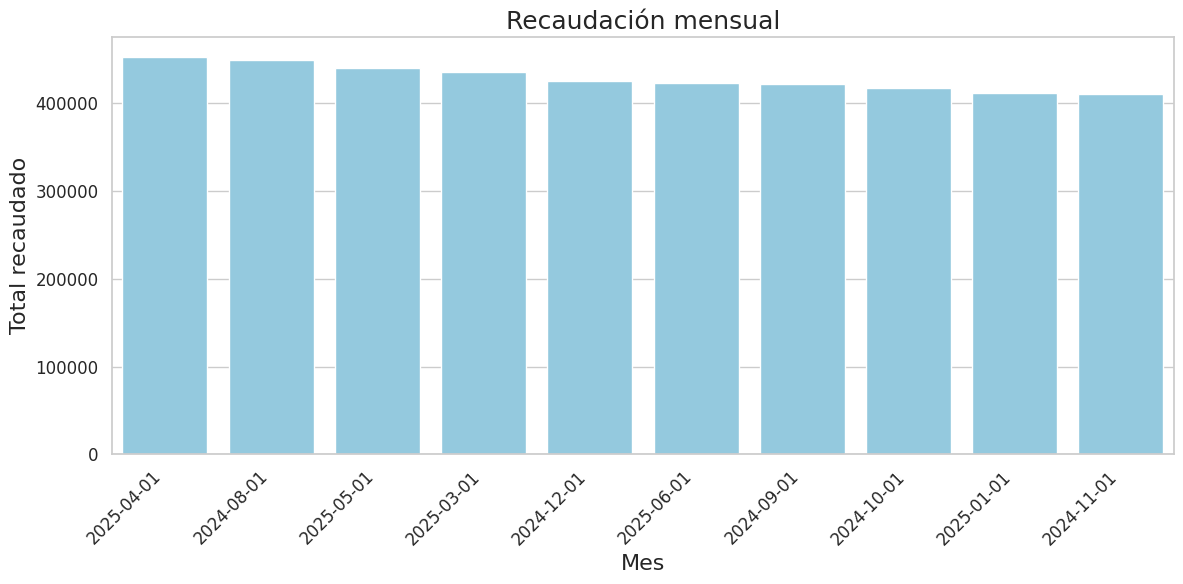

In [19]:
from app.utils import report_utils
report_utils.show_monthly_sales()

## 6. Recomendaciones 
- O se sugieren accioables para esta tabla.

## 7. Consultas SQL relevantes
[Anexo](/pi_mod_02/scripts/sql/report.sql)

# Informe Técnico - Exploración Tabla ReseñasProductos

## 1. Descripción general
- Cantidad de registros: 10000
- Columnas presentes: 6

## 2. Revisión de columnas

| Columna        | Tipo de dato    | Valores no nulos | Observaciones                                                     |
| -------------- | --------------- | ---------------- | ----------------------------------------------------------------- |
| `ReseñaID`     | int64           | 10,000           | Clave primaria. Identificador único de cada reseña.               |
| `UsuarioID`    | int64           | 10,000           | Clave foránea a `Usuarios`.                                       |
| `ProductoID`   | int64           | 10,000           | Clave foránea a `Productos`.                                      |
| `Calificacion` | int64           | 10,000           | Escala discreta de 1 a 5. Restricción CHECK definida.             |
| `Comentario`   | object (texto)  | 10,000           | Texto libre. Puede requerir limpieza (espacios, caracteres, etc). |
| `Fecha`        | datetime64\[ns] | 10,000           | Fecha y hora de la reseña.           |

## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: Calificacion debe estar enre 1 y 5

## 4. Principales hallazgos
- La distribución de puntajes es uniforme, registrando alrrededor de dos mil reseñas para cada puntaje
- Todos los usuarios han hecho al menos una reseña.

## 5. Visualizaciones
- Se graficó número de reseñas para cada calificación y puede observarse que la frecuencia es muy similar para todas las opciones.

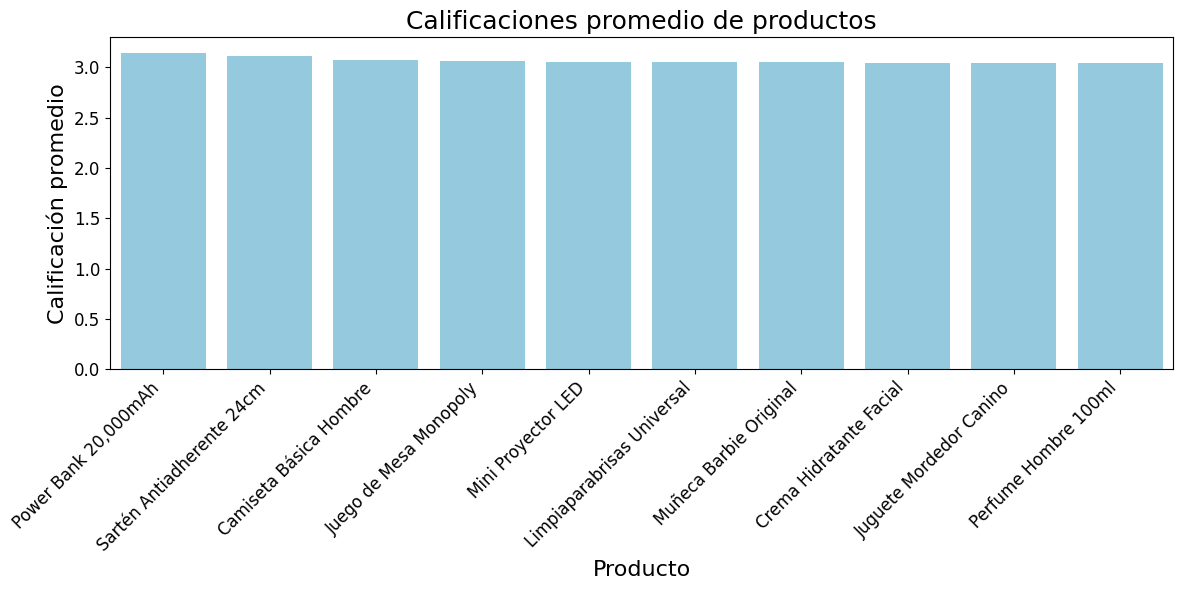

In [1]:
from app.utils import report_utils

report_utils.show_rating_bar_chart()


## 6. Recomendación
- Sin sugerencias

## 7. Consultas SQL relevantes
[Anexo](/pi_mod_02/scripts/sql/report.sql)

# Informe Técnico - Exploración Tabla HistorialPagos

## 1. Descripción general
- Cantidad de registros: 10000
- Columnas presentes: 6

## 2. Revisión de columnas

| Columna        | Tipo de dato    | Valores no nulos | Observaciones                                       |
| -------------- | --------------- | ---------------- | --------------------------------------------------- |
| `PagoID`       | `SERIAL`        | 10000            | Clave primaria, identificador único de pago.        |
| `OrdenID`      | `INT`           | 10000            | Clave foránea referenciando la tabla `Ordenes`.     |
| `MetodoPagoID` | `INT`           | 10000            | Clave foránea referenciando la tabla `MetodosPago`. |
| `Monto`        | `DECIMAL(10,2)` | 10000            | Monto total del pago realizado.                     |
| `FechaPago`    | `TIMESTAMP`     | 10000            | Fecha y hora del pago.                              |
| `EstadoPago`   | `VARCHAR(50)`   | 10000            | Estado del pago, por defecto 'Procesando'.          |


## 3. Calidad de datos
- Valores faltantes: -
- Valores por defecto: -
- Validaciones aplicadas: onto no puede ser nulo, FechaPago tiene HOY como valor por defecto y EstadoPago por defecto es 'Procesando'

## 4. Principales hallazgos
- El valor mínimo es apx 100 y el máximo 999.73, lo cual conincide con análisis previos vinculados a pagos.
- MontoLa medio es 551.02, consistente con lo explorado en ordenes.
- Posibles problemas con duplicados en emails

## 5. Visualizaciones

Distribución de Montos – GRafica Cantidad de pagos y monto.

Frecuencia por MetodoPagoID – gráfico de barras

Distribución de EstadoPago – gráfico de torta o barras

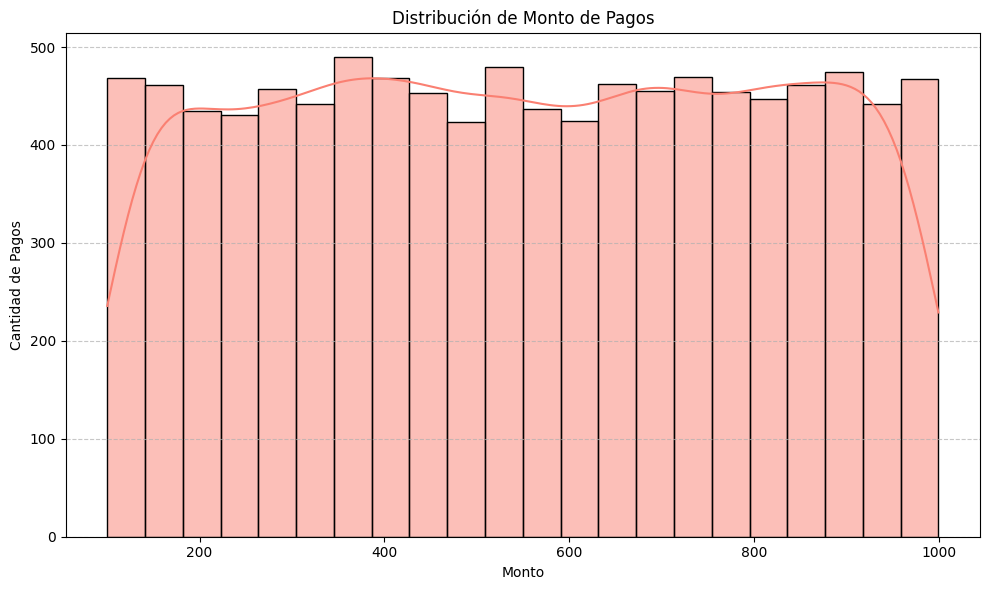

In [2]:
from app.utils import notebook_utils, postgres_utils, plot_utils

query = """
SELECT "Monto"
FROM "HistorialPagos";
"""
notebook_utils.print_colored("Distribución de monto de pagos", "green")
df_montos = postgres_utils.run_query(query)

plot_utils.plot_histogram_with_outliers(
    df=df_montos,
    column='Monto',
    bins='auto',
    title='Distribución de Monto de Pagos',
    color='salmon',
    label_x='Monto',
    label_y='Cantidad de Pagos',
)

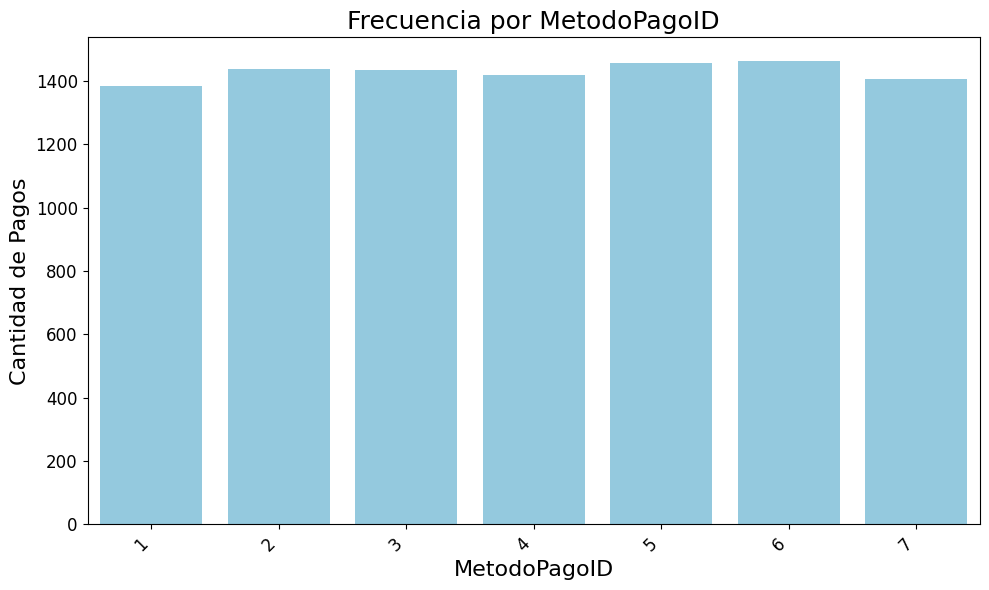

In [2]:
from app.utils import report_utils
report_utils.show_payment_method_frequency_chart()



## 6. Recomendaciones
- La columna EstadoPago toma valores categóricos(Pendient, Cancelado, etc), debería llevarse a una tabla EstadosPago para referencia mediante ID en Historial de pagos

## 7. Consultas SQL relevantes
[Anexo](/pi_mod_02/scripts/sql/report.sql)